### WINE CQUALITY PREDICTION BY UDING CLASSIFICATION

#### IMPORT LIBRARIES

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [33]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [35]:
df.tail

<bound method NDFrame.tail of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [36]:
df.shape

(1599, 12)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [38]:
# count of quality features
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

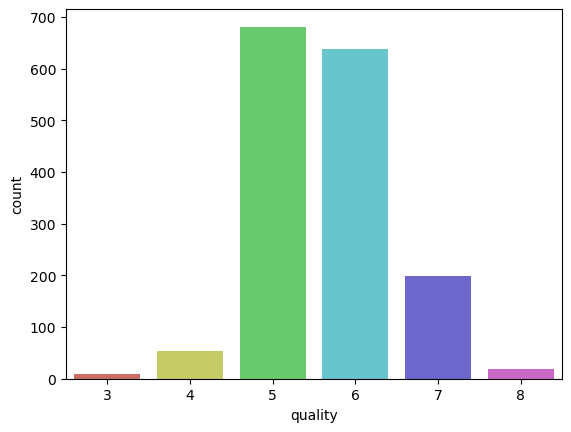

In [39]:
sns.countplot(x = df['quality'],palette ='hls')

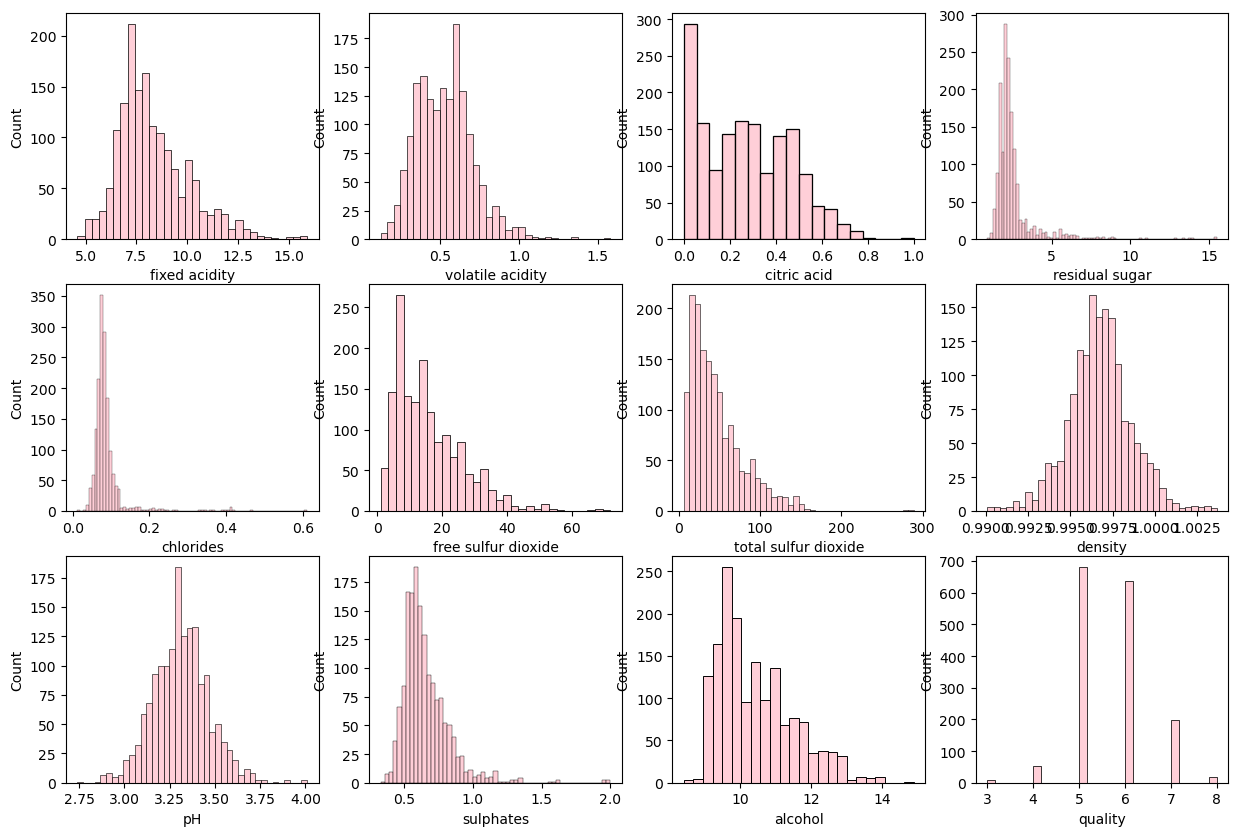

In [9]:
Num_fea = df.select_dtypes(exclude='object')
# Disribution of plot eachas sub plot
# use normal distribution and binomial distribution
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,10))
k = 0
for i in range(3):
    for j in range(4):
        sns.histplot(df[df.columns[k]], ax = axes[i][j], color ='pink')
        k += 1

In [10]:
#apply log transformation to skewed features
# df['volatile acidity'] = np.log1p(df['volatile acidity'])
# df['citric acid'] = np.log1p(df['citric acid'])
df['residual sugar'] = np.log(df['residual sugar'])
df['chlorides'] = np.log(df['chlorides'])
df['free sulfur dioxide'] = np.log(df['free sulfur dioxide'])
df['total sulfur dioxide'] = np.log(df['total sulfur dioxide'])
df['sulphates'] = np.log(df['sulphates'])
df['alcohol'] = np.log(df['alcohol'])
#df['alchol'] = np.

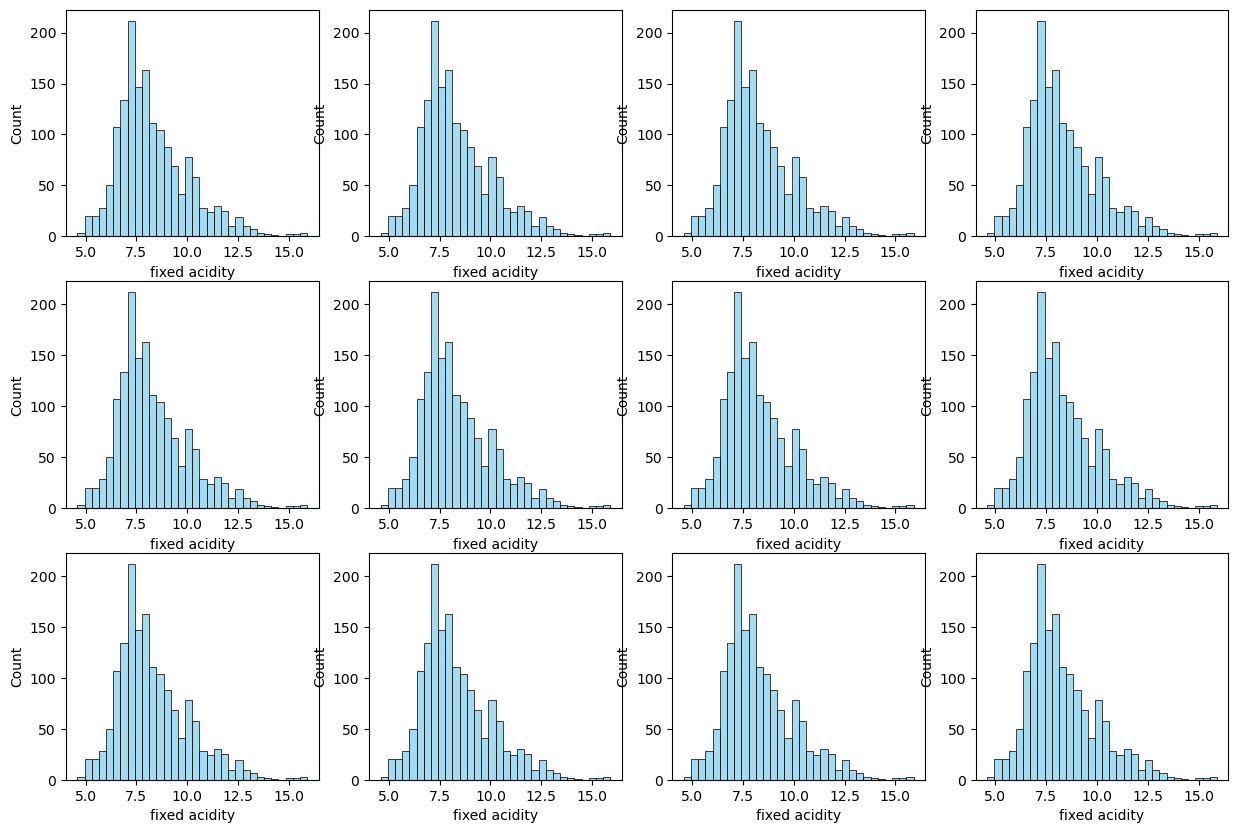

In [11]:
Num_fea = df.select_dtypes(exclude = 'object')
# Disribution of plot each as sub plot  
# use normal distribution and binomial distribution
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,10))
k = 0
for i in range(3):
    for j in range(4):
        sns.histplot(df[df.columns[k]], ax = axes[i][j], color ='skyblue')

In [12]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
# duplicates
df.duplicated().sum()

np.int64(240)

In [14]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [15]:
# independent feature
X = df.drop('quality', axis='columns')
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710
1,7.8,0.88,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,2.282382
2,7.8,0.76,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,2.282382
3,11.2,0.28,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,2.282382
5,7.4,0.66,0.00,0.587787,-2.590267,2.564949,3.688879,0.9978,3.51,-0.579818,2.240710


In [16]:
y = df['quality']
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [17]:
y.value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

#### IS IMBALANCED DATA WE NEED CONVERT INTO BALANCED DATA SO TO CONVERT WE USE IMBLEARN TO INSTALL we pip install imblearn by using upsampling

In [18]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
#transform the dataset
X, y = oversample.fit_resample(X.fillna(0), y)


In [19]:
y.value_counts()

quality
5    577
6    577
7    577
4    577
8    577
3    577
Name: count, dtype: int64

In [20]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,0.848276,-2.502853,2.547871,3.604522,0.996709,3.309787,-0.444642,2.339773,5.623252
std,1.736990,0.183031,0.195537,0.350004,0.336045,0.683899,0.711538,0.001869,0.155036,0.224199,0.100287,0.823578
min,4.600000,0.120000,0.000000,-0.105361,-4.422849,0.000000,1.791759,0.990070,2.740000,-1.108663,2.128232,3.000000
25%,7.100000,0.390000,0.090000,0.641854,-2.659260,1.945910,3.091042,0.995600,3.210000,-0.597837,2.251292,5.000000
50%,7.900000,0.520000,0.260000,0.788457,-2.538307,2.639057,3.637586,0.996700,3.310000,-0.478036,2.322388,6.000000
75%,9.200000,0.640000,0.430000,0.955511,-2.396896,3.044522,4.143135,0.997820,3.400000,-0.314711,2.406945,6.000000
max,15.900000,1.580000,1.000000,2.740840,-0.492658,4.276666,5.666427,1.003690,4.010000,0.693147,2.701361,8.000000


In [21]:
# appaly standard scalar 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.523559,0.430152,-1.283590,-0.668990,-0.192570,0.040801,0.273138,0.707619,1.122528,-0.604807,-1.240573
1,-0.287196,1.129217,-1.283590,0.246377,0.590998,1.271185,1.243013,0.188113,-0.850763,0.270066,-0.845986
2,-0.287196,0.663174,-1.088563,-0.111421,0.396276,0.505623,0.934594,0.292014,-0.468835,0.066752,-0.845986
3,1.721892,-1.200999,1.446784,-0.668990,-0.233393,0.693202,1.085238,0.811520,-1.105381,-0.446685,-0.845986
4,-0.523559,0.274805,-1.283590,-0.826777,-0.233393,0.291161,0.505507,0.707619,1.122528,-0.604807,-1.240573


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
##  Apply LogRegression

from sklearn.linear_model import LogisticRegression
model_LogReg = LogisticRegression()
model_LogReg.fit(X_train,y_train)
LogReg_acc=round(model_LogReg.score(X_test, y_test)*100)
LogReg_acc

62

In [24]:
# support vector machine
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
SVM_Accuracy = round(accuracy_score(y_test, model.predict(X_test)) * 100, 2)
SVM_Accuracy

76.19

In [25]:
# random forese regressor with estimate
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=10)
RF_model.fit(X_train, y_train)
from sklearn.metrics import r2_score
RFR_Accuracy=round(r2_score(y_test, RF_model.predict(X_test)) * 100)
RFR_Accuracy

92

In [26]:
#  decission tree regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
DTR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
DTR_Accuracy

87

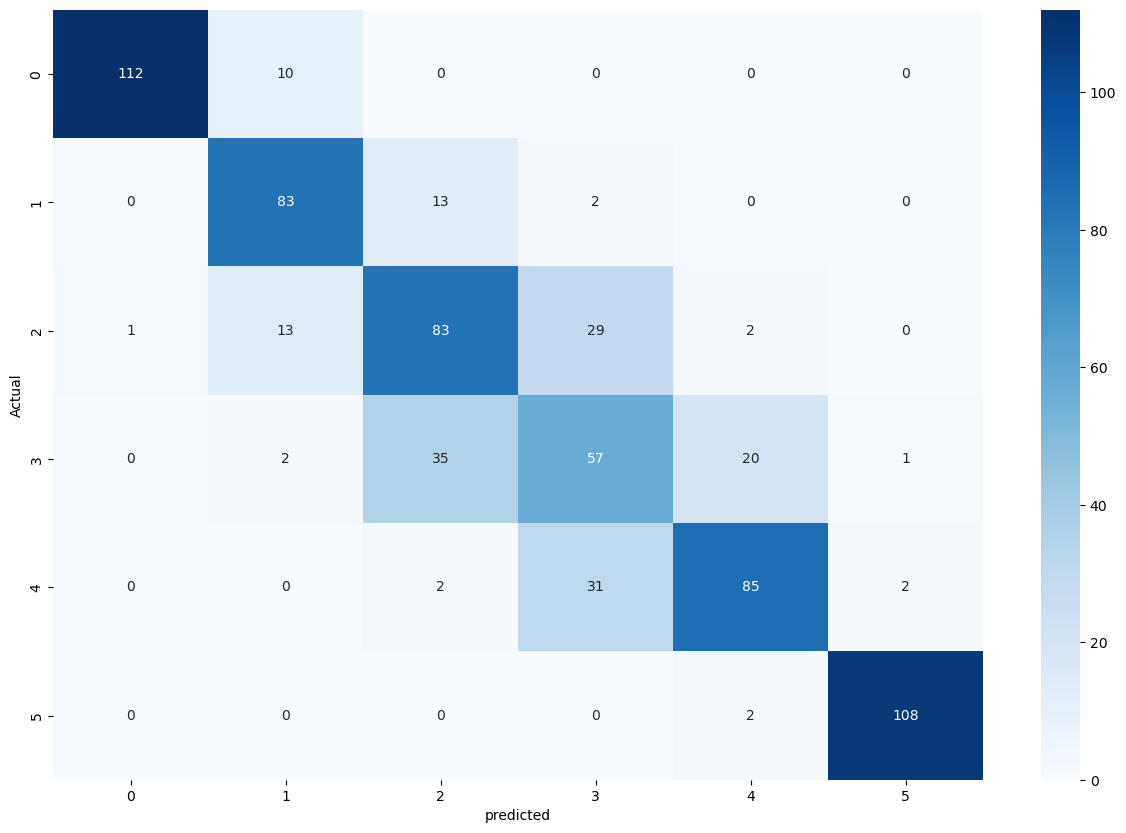

array([[112,  10,   0,   0,   0,   0],
       [  0,  83,  13,   2,   0,   0],
       [  1,  13,  83,  29,   2,   0],
       [  0,   2,  35,  57,  20,   1],
       [  0,   0,   2,  31,  85,   2],
       [  0,   0,   0,   0,   2, 108]])

In [27]:
# heatmap for confusion matrix (ensure cm exists and is 2-d)
from sklearn.metrics import confusion_matrix
import numpy as np

try:
    # check if cm is defined and 2_d
    if not ('cm' in globals() and hasattr(cm, "ndim") and cm.ndim == 2):
         raise NameError
except NameError:
    # round predictions to nearest integer since RF_model is a regressor
    cm = confusion_matrix(y_test, np.round(RF_model.predict(X_test)).astype(int))

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()
cm

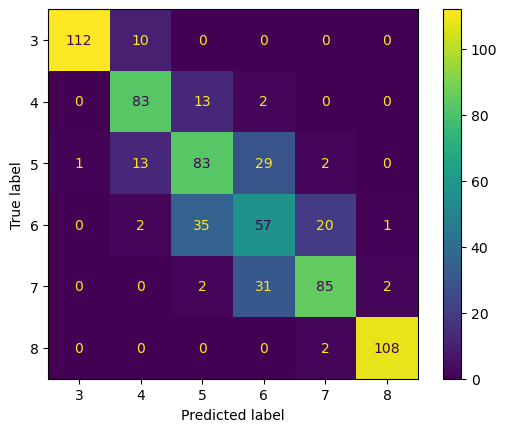

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [3,4,5,6,7,8])
cm_display.plot()
plt.show()

In [29]:
feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol']
feature_values={
    'fixed acidity':7.4,
    'volatile acidity':0.70,
    'citric acid':0.00,
    'residual sugar':0.645738,
    'chlorides':0.9,
    'free sulfur dioxide':0.56,
    'total sulfur dioxide':98,
    'density':1,
    'pH':8,
    'sulphates':6.8,
    'alcohol':5.3
}

# create dataframe with user input 
user_input= pd.DataFrame([feature_values],columns=feature_names)

# scaler
user_input = scaler.transform(user_input)
# make the prediction 
prediction = model.predict(user_input)

print("predicted value", prediction)

predicted value [7.]


In [30]:
#  save scaler 
import pickle
filename = 'scaler_model.csv'
pickle.dump(scaler, open(filename, 'wb'))

In [31]:
# save random forest model
import pickle
filename = 'finalized_model.sav'
pickle.dump(RF_model, open(filename, 'wb'))